In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split

In [2]:
urothelial_cells=pd.read_pickle("urothelial_cell_toy_data.pkl")
images=np.transpose(urothelial_cells["X"].numpy()*255,(0,2,3,1)).astype(np.uint8)
labels=urothelial_cells["y"]
X = urothelial_cells["X"].numpy()  # (200, 3, 256, 256)
Y = urothelial_cells["y"]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = torch.FloatTensor(X_train)  # (N, C, H, W)
X_val = torch.FloatTensor(X_val)
Y_train = torch.LongTensor(Y_train)  # (N, 1, H, W)
Y_val = torch.LongTensor(Y_val)

# Print shapes for verification
print(f"X_train shape: {X_train.shape}")  # Expected: (160, 3, 256, 256)
print(f"Y_train shape: {Y_train.shape}")  # Expected: (160, 1, 256, 256)
print(f"X_val shape: {X_val.shape}") 

X_train shape: torch.Size([160, 3, 256, 256])
Y_train shape: torch.Size([160, 256, 256])
X_val shape: torch.Size([40, 3, 256, 256])


In [3]:
import importlib
import sys
from semseg_functions import load_imgs_labels,train_model,make_predictions, train_model_transunet, make_predictions_transunet, make_predictions_transunet_sweep, train_model_transunet_sweep
importlib.reload(sys.modules["semseg_functions"])
from semseg_functions import load_imgs_labels,train_model,make_predictions, train_model_transunet, make_predictions_transunet, make_predictions_transunet_sweep, train_model_transunet_sweep
from augment_train import augment_train
importlib.reload(sys.modules["augment_train"])
from augment_train import augment_train
from transunet import TransUNet
from matplotlib import pyplot as plt
from scipy.stats import spearmanr
from sklearn.metrics import classification_report

grid = {
    "lr": [1e-3, 1e-2, 1e-1],
    "momentum": [0.9, 0.99],
    "weight_decay": [1e-4, 1e-3, 1e-2]
}

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

results = []

for lr in grid["lr"]:
    for momentum in grid["momentum"]:
        for weight_decay in grid["weight_decay"]:
            y_val_pred = make_predictions_transunet_sweep(X_val, lr=lr, momentum=momentum, weight_decay=weight_decay)
            y_val_pred_flat = y_val_pred.transpose(0, 2, 3, 1).reshape(-1, y_val_pred.shape[1])
            y_true = Y_val.numpy().flatten()
            y_true_binarized = label_binarize(y_true, classes=[0, 1, 2])

            try:
                auroc = roc_auc_score(y_true_binarized, y_val_pred_flat, multi_class='ovr')
            except ValueError:
                auroc = float("nan")  # Handle missing class cases

            results.append({
                "lr": lr,
                "momentum": momentum,
                "weight_decay": weight_decay,
                "auroc": auroc
            })


c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.9_wd0.0001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.9_wd0.001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.9_wd0.01.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.99_wd0.0001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.99_wd0.001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.99_wd0.01.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.01_mom0.9_wd0.0001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.01_mom0.9_wd0.001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.01_mom0.9_wd0.01.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.01_mom0.99_wd0.0001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.01_mom0.99_wd0.001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.01_mom0.99_wd0.01.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.1_mom0.9_wd0.0001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.1_mom0.9_wd0.001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.1_mom0.9_wd0.01.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.1_mom0.99_wd0.0001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.1_mom0.99_wd0.001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.1_mom0.99_wd0.01.pkl


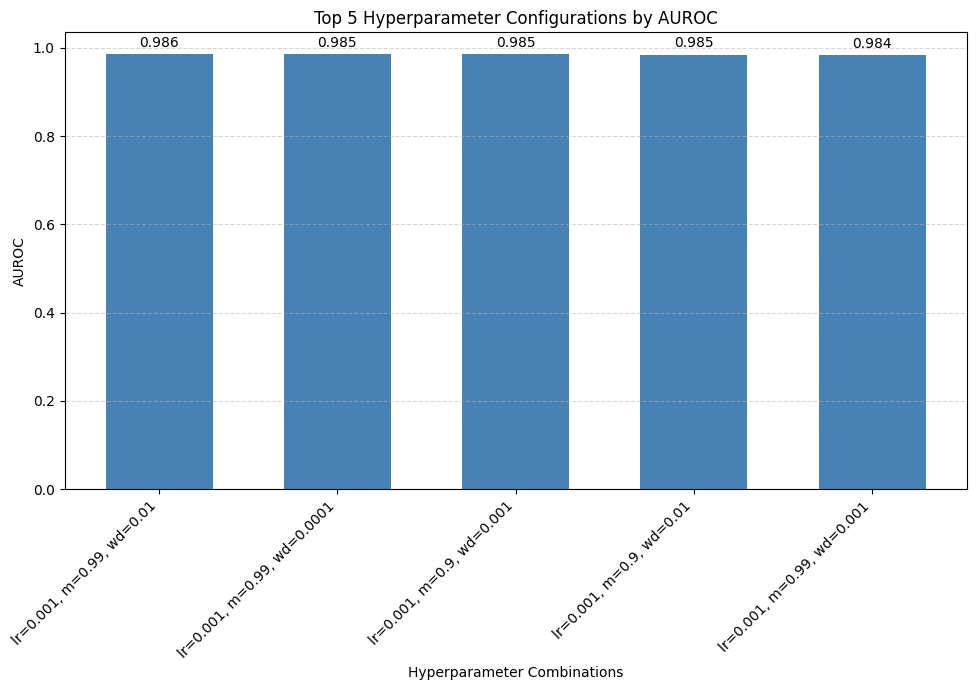

In [6]:
import pandas as pd

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Create readable string labels for each hyperparameter combo
df_results["label"] = df_results.apply(
    lambda row: f"lr={row.lr}, m={row.momentum}, wd={row.weight_decay}", axis=1
)

# Sort and take top 5 based on AUROC
df_top5 = df_results.sort_values(by="auroc", ascending=False).head(5).reset_index(drop=True)

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df_top5))
width = 0.6

fig, ax = plt.subplots(figsize=(10, 7))

# Bar plot
bars = ax.bar(x, df_top5["auroc"], width, color="steelblue")

# Labeling
ax.set_xlabel("Hyperparameter Combinations")
ax.set_ylabel("AUROC")
ax.set_title("Top 5 Hyperparameter Configurations by AUROC")
ax.set_xticks(x)
ax.set_xticklabels(df_top5["label"], rotation=45, ha="right")
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Annotate each bar with AUROC value
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.annotate(f"{height:.3f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.99_wd0.01.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.99_wd0.0001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.9_wd0.001.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.9_wd0.01.pkl


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:416: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.99_wd0.001.pkl


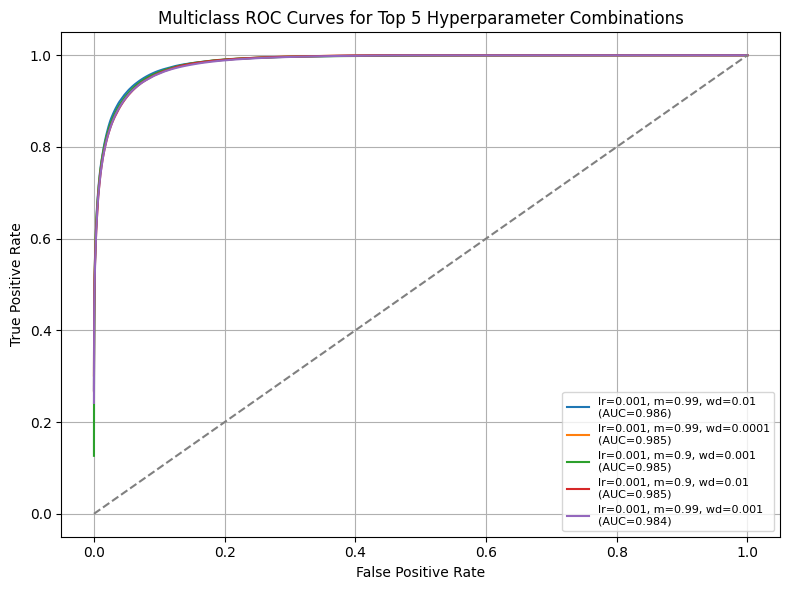

In [9]:
from sklearn.metrics import roc_curve, auc

fig, ax = plt.subplots(figsize=(8, 6))

classes = [0, 1, 2]  # Adjust if your dataset has different class labels
y_true = Y_val.numpy().flatten()
y_true_binarized = label_binarize(y_true, classes=classes)

for idx, row in df_top5.iterrows():
    # Predict using the top configuration
    y_pred = make_predictions_transunet_sweep(
        X_val, lr=row.lr, momentum=row.momentum, weight_decay=row.weight_decay
    )
    
    # Reshape to (N, C)
    y_pred_flat = y_pred.transpose(0, 2, 3, 1).reshape(-1, y_pred.shape[1])

    # Compute ROC for each class
    fpr = dict()
    tpr = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_flat[:, i])

    # Macro-average ROC curve
    all_fpr = np.unique(np.concatenate([fpr[i] for i in fpr]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in fpr:
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(fpr)
    
    mean_auc = auc(all_fpr, mean_tpr)
    
    label = f"lr={row.lr}, m={row.momentum}, wd={row.weight_decay}"
    ax.plot(all_fpr, mean_tpr, label=f"{label}\n(AUC={mean_auc:.3f})")

# Plot diagonal line
ax.plot([0, 1], [0, 1], linestyle="--", color="gray")

# Final formatting
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("Multiclass ROC Curves for Top 5 Hyperparameter Combinations")
ax.legend(loc="lower right", fontsize=8)
ax.grid(True)

plt.tight_layout()
plt.show()


In [4]:
import importlib
import sys
from semseg_functions import load_imgs_labels,train_model,make_predictions, train_model_transunet, make_predictions_transunet, make_predictions_transunet_sweep, train_model_transunet_sweep
importlib.reload(sys.modules["semseg_functions"])
from semseg_functions import load_imgs_labels,train_model,make_predictions, train_model_transunet, make_predictions_transunet, make_predictions_transunet_sweep, train_model_transunet_sweep
from augment_train import augment_train
importlib.reload(sys.modules["augment_train"])
from augment_train import augment_train
from transunet import TransUNet
from matplotlib import pyplot as plt
from scipy.stats import spearmanr
from sklearn.metrics import classification_report



#model = TransUNet()

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train_aug, Y_train_aug = augment_train(X_train, Y_train, augment_times=2)

grid = {
    "lr": [0.0008,0.001,0.003],
    "momentum": [0.9],
    "weight_decay": [0.008, .01, 0.03]
}
for lr in grid["lr"]:
    for momentum in grid["momentum"]:
        for weight_decay in grid["weight_decay"]:
            print(f"lr: {lr}, momentum: {momentum}, weight_decay: {weight_decay}")
            model=train_model_transunet_sweep(X_train_aug,Y_train_aug,X_val,Y_val, lr=lr, momentum=momentum, weight_decay=weight_decay)
        

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


X_train shape: torch.Size([160, 3, 256, 256])
Y_train shape: torch.Size([160, 256, 256])


c:\Python312\Lib\site-packages\torch\nn\functional.py:4969: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Python312\Lib\site-packages\torch\nn\functional.py:4902: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Augmented X shape: torch.Size([480, 3, 256, 256]), Augmented Y shape: torch.Size([480, 256, 256])
lr: 0.0008, momentum: 0.9, weight_decay: 0.008
Using device: cuda
Training: Epoch 1, Batch 0, Loss: 1.094
Training: Epoch 1, Batch 1, Loss: 1.11
Training: Epoch 1, Batch 2, Loss: 1.096
Training: Epoch 1, Batch 3, Loss: 1.108
Training: Epoch 1, Batch 4, Loss: 1.102
Training: Epoch 1, Batch 5, Loss: 1.109
Training: Epoch 1, Batch 6, Loss: 1.094
Training: Epoch 1, Batch 7, Loss: 1.114
Training: Epoch 1, Batch 8, Loss: 1.101
Training: Epoch 1, Batch 9, Loss: 1.099
Training: Epoch 1, Batch 10, Loss: 1.102
Training: Epoch 1, Batch 11, Loss: 1.097
Training: Epoch 1, Batch 12, Loss: 1.105
Training: Epoch 1, Batch 13, Loss: 1.095
Training: Epoch 1, Batch 14, Loss: 1.103
Training: Epoch 1, Batch 15, Loss: 1.114
Training: Epoch 1, Batch 16, Loss: 1.089
Training: Epoch 1, Batch 17, Loss: 1.077
Training: Epoch 1, Batch 18, Loss: 1.09
Training: Epoch 1, Batch 19, Loss: 1.076
Training: Epoch 1, Batch 20,

In [5]:
importlib.reload(sys.modules["semseg_functions"])
from semseg_functions import load_imgs_labels,train_model,make_predictions, train_model_transunet, make_predictions_transunet, make_predictions_transunet_sweep, train_model_transunet_sweep
for lr in grid["lr"]:
    for momentum in grid["momentum"]:
        for weight_decay in grid["weight_decay"]:
            print(f"lr: {lr}, momentum: {momentum}, weight_decay: {weight_decay}")
            #model=train_model_transunet_sweep(X_train_aug,Y_train_aug,X_val,Y_val, lr=lr, momentum=momentum, weight_decay=weight_decay)
            y_val_pred=make_predictions_transunet_sweep(X_val, lr=lr, momentum=momentum, weight_decay=weight_decay)
            y_val_pred_lbls=y_val_pred.argmax(1)
            print(classification_report(Y_val.numpy().flatten(),y_val_pred_lbls.flatten()))

lr: 0.0008, momentum: 0.9, weight_decay: 0.008


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:338: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.0008_mom0.9_wd0.008.pkl
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    937035
           1       0.94      0.83      0.88   1187442
           2       0.75      0.92      0.82    496963

    accuracy                           0.90   2621440
   macro avg       0.88      0.91      0.89   2621440
weighted avg       0.91      0.90      0.90   2621440

lr: 0.0008, momentum: 0.9, weight_decay: 0.01


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:338: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.0008_mom0.9_wd0.01.pkl
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    937035
           1       0.94      0.84      0.89   1187442
           2       0.77      0.92      0.84    496963

    accuracy                           0.90   2621440
   macro avg       0.89      0.91      0.90   2621440
weighted avg       0.91      0.90      0.91   2621440

lr: 0.0008, momentum: 0.9, weight_decay: 0.03


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:338: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.0008_mom0.9_wd0.03.pkl
              precision    recall  f1-score   support

           0       0.97      0.95      0.96    937035
           1       0.92      0.88      0.90   1187442
           2       0.79      0.91      0.85    496963

    accuracy                           0.91   2621440
   macro avg       0.90      0.91      0.90   2621440
weighted avg       0.92      0.91      0.91   2621440

lr: 0.001, momentum: 0.9, weight_decay: 0.008


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:338: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.9_wd0.008.pkl
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    937035
           1       0.94      0.86      0.90   1187442
           2       0.78      0.94      0.85    496963

    accuracy                           0.91   2621440
   macro avg       0.89      0.92      0.90   2621440
weighted avg       0.92      0.91      0.91   2621440

lr: 0.001, momentum: 0.9, weight_decay: 0.01


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:338: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.9_wd0.01.pkl
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    937035
           1       0.93      0.86      0.89   1187442
           2       0.77      0.92      0.84    496963

    accuracy                           0.91   2621440
   macro avg       0.89      0.91      0.90   2621440
weighted avg       0.91      0.91      0.91   2621440

lr: 0.001, momentum: 0.9, weight_decay: 0.03


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:338: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.001_mom0.9_wd0.03.pkl
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    937035
           1       0.93      0.86      0.90   1187442
           2       0.77      0.93      0.84    496963

    accuracy                           0.91   2621440
   macro avg       0.89      0.92      0.90   2621440
weighted avg       0.92      0.91      0.91   2621440

lr: 0.003, momentum: 0.9, weight_decay: 0.008


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:338: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.003_mom0.9_wd0.008.pkl
              precision    recall  f1-score   support

           0       0.97      0.96      0.97    937035
           1       0.93      0.87      0.90   1187442
           2       0.78      0.93      0.85    496963

    accuracy                           0.91   2621440
   macro avg       0.90      0.92      0.91   2621440
weighted avg       0.92      0.91      0.91   2621440

lr: 0.003, momentum: 0.9, weight_decay: 0.01


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:338: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.003_mom0.9_wd0.01.pkl
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    937035
           1       0.95      0.88      0.91   1187442
           2       0.83      0.92      0.87    496963

    accuracy                           0.92   2621440
   macro avg       0.91      0.93      0.92   2621440
weighted avg       0.93      0.92      0.92   2621440

lr: 0.003, momentum: 0.9, weight_decay: 0.03


c:\Users\Chris\Documents\MasterProject590\code\demos\Project2\semseg_functions.py:338: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_p

Loading model from: ./seg_models\best_transunet_lr0.003_mom0.9_wd0.03.pkl
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    937035
           1       0.93      0.86      0.89   1187442
           2       0.77      0.90      0.83    496963

    accuracy                           0.91   2621440
   macro avg       0.89      0.91      0.90   2621440
weighted avg       0.91      0.91      0.91   2621440

